# Task6: Predicting Real Estate House Prices

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [204]:
import sklearn 
import pandas as pd
import seaborn as sns

### Read the csv data into a pandas dataframe and display the first 5 samples

In [205]:
data = pd.read_csv('Real_estate.csv')
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Show more information about the dataset

In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Find how many samples are there and how many columns are there in the dataset

In [207]:
data.shape

(414, 8)

### What are the features available in the dataset?

In [208]:
data.keys()

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

### Check if any features have missing data

In [209]:
data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### Group all the features as dependent features in X

In [210]:
X = data.drop('Y house price of unit area', axis=1)
X

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


### Group feature(s) as independent features in y

In [211]:
y = data['Y house price of unit area']
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

### Split the dataset into train and test data

In [212]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=69420)

### Choose the model (Linear Regression)

In [213]:
from sklearn.linear_model import LinearRegression

### Create an Estimator object

In [214]:
model = LinearRegression(fit_intercept=True)

### Train the model

In [215]:
model.fit(X_train, y_train)

LinearRegression()

### Apply the model

In [216]:
preds = model.predict(X_test)
preds

array([53.58981163, 36.32379241, 11.93581509,  9.90217574, 42.91644201,
       38.44029425, 45.21083556, 16.17663924, 36.59354605, 34.32475581,
       46.69905157, 40.04039567, 44.18338502, 33.87432426, 46.51623164,
       24.15986466, 47.55644807, 38.99805352, 38.51013303, 48.05853915,
       43.67468572])

### Display the coefficients

In [217]:
model.coef_

array([-3.65036781e-03,  5.22576822e+00, -2.61775569e-01, -4.55490932e-03,
        1.11511682e+00,  2.17034353e+02, -1.46886837e+01])

### Find how well the trained model did with testing data

In [218]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, preds)
print('r2 Score :', r2)

r2 Score : 0.8193138667873842


### Plot House Age Vs Price
#### Hint: Use regplot in sns

<AxesSubplot:xlabel='X2 house age', ylabel='Y house price of unit area'>

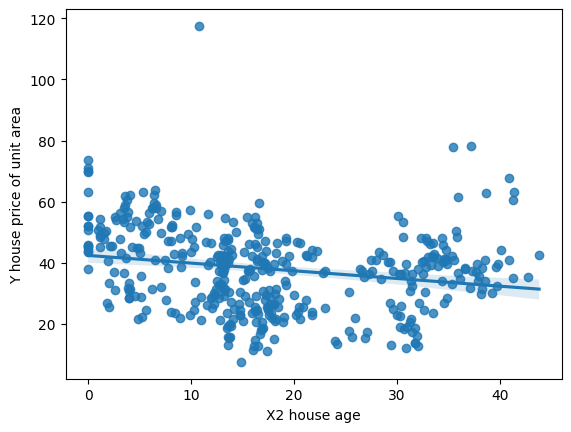

In [219]:
sns.regplot(x='X2 house age', y='Y house price of unit area', data=data)

### Plot Distance to MRT station Vs Price

<AxesSubplot:xlabel='Y house price of unit area', ylabel='X3 distance to the nearest MRT station'>

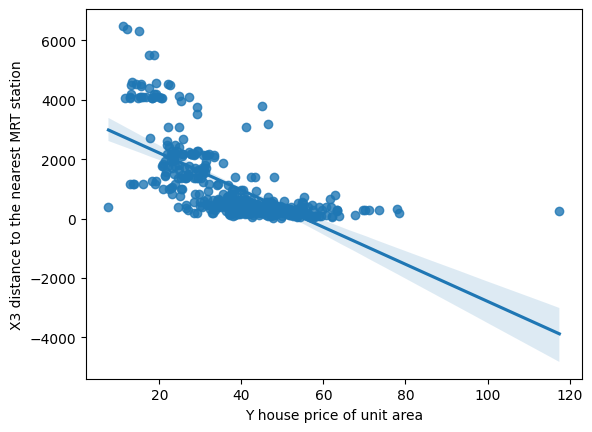

In [220]:
sns.regplot(x='Y house price of unit area', y='X3 distance to the nearest MRT station', data=data)

### Plot Number of Convienience Stores Vs Price

<AxesSubplot:xlabel='Y house price of unit area', ylabel='X4 number of convenience stores'>

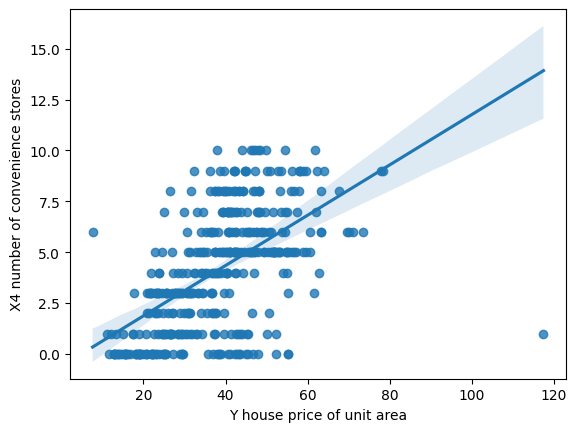

In [221]:
sns.regplot(x='Y house price of unit area', y='X4 number of convenience stores', data=data)